In [13]:
import numpy as numpy
import matplotlib.pyplot as plt
import copy
from prettytable import PrettyTable as ptbl
from math import *

MaxIterations = 1000

In [14]:
def Muller(f, p, q, r, TOL, N = MaxIterations): 

    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(p)
    x1 = copy.copy(q)
    x2 = copy.copy(r)
    
    print("\n\n*** MULLER METHOD IMPLEMENTATION ***")
    
    data = []           # list for storing data to plot table
    accuracy = []       # list for storing data to plot graph
    
    h1 = x1 - x0  
    h2 = x2 - x1 
    
    f0 = f(x0) 
    f1 = f(x1) 
    f2 = f(x2) 
    
    d1 = (f1 - f0)/h1  
    d2 = (f2 - f1)/h2 
    d = (d2-d1)/(h1+h2) 
    i = 3
    
    while i<=N: 
        
        b = d2 +h2*d
        D = ((b**2)-4*f2*d)**(1/2)
            
        if(abs(b-D) < abs(b+D)):
            E = b + D 
        else:
            E = b - D

        h = -2*f2/E
        p = x2 + h
        
       
        
        print(f'Iteration = {i:3}   a = {d:.6f}     b = {b:.6f}     c = {f(x2):.6f}     p = {p:.6f}     f(p) = {f(p):.6f}')
        
        # Adding data in data list which was created for plotting table
        data.append([i,d,b,f(x2),p,f(p)])

        if(abs(h)<TOL or abs(f(p)) < TOL):
            print("\nFinal Root found")
            print(f'Iteration = {i:3}  a = {d:.6f}      b = {b:.6f}     c = {f(x2):.6f}    p = {p:.6f}       f(p) = {f(p):.6f}')
            print(f"Required Root is: {p:3.6f}")
            break
        
        x0 = x1
        x1 = x2
        x2 = p

        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([i,abs(x1-x2)])

        h1 = x1 - x0  
        h2 = x2 - x1 

        f0 = f(x0) 
        f1 = f(x1) 
        f2 = f(x2) 
        
        d1 = (f1 - f0)/h1  
        d2 = (f2 - f1)/h2 
        d = (d2-d1)/(h1+h2) 
    
        i += 1          # Incrementing step count for next iteration

    # Making table with prettytable module and adding data in it
    table = ptbl(['Iteration','a','b','c','p (root)','f(p)'])
    for dt in data:
        table.add_row(dt)

    if (i > MaxIterations): 
        print("Root cannot be found using, Muller's method") 

    return accuracy,table

In [15]:
# Defining Function
def f(x):
    q = (x**4) -4*(x**2)-3*(x) +5
    return q

# Initial Guesses and accuracy
x0 = -1.0
x1 = complex(-1,1)
x2 = complex(-1,0.9)

e = 0.001

In [16]:
m_acc,Muller_table = Muller(f,x0,x1,x2,e)



*** MULLER METHOD IMPLEMENTATION ***
Iteration =   3   a = -0.710000-7.600000j     b = 11.080000+0.432000j     c = 4.036100+3.816000j     p = -1.477287+0.719073j     f(p) = 1.030142-0.735090j
Iteration =   4   a = -0.456354-12.069548j     b = 6.701262+12.093050j     c = 1.030142-0.735090j     p = -1.473259+0.807495j     f(p) = -0.009394-0.130958j
Iteration =   5   a = 2.546170-12.738200j     b = 7.420400+12.216615j     c = -0.009394-0.130958j     p = -1.465098+0.811766j     f(p) = 0.000000+0.002572j
Iteration =   6   a = 5.350707-13.766500j     b = 7.727553+12.281455j     c = 0.000000+0.002572j     p = -1.465248+0.811672j     f(p) = -0.000000+0.000001j

Final Root found
Iteration =   6  a = 5.350707-13.766500j      b = 7.727553+12.281455j     c = 0.000000+0.002572j    p = -1.465248+0.811672j       f(p) = -0.000000+0.000001j
Required Root is: -1.465248+0.811672j


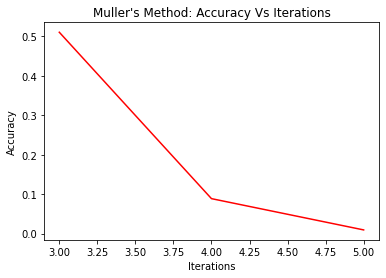

In [17]:
m_i = []
m_a = []
for i in m_acc:
    m_i.append(i[0])
    m_a.append(i[1])
plt.title("Muller's Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(m_i,m_a,color = 'red')
plt.show()

In [18]:
print(Muller_table)

+-----------+--------------------------------------------+------------------------------------------+-------------------------------------------------+-------------------------------------------+-------------------------------------------------+
| Iteration |                     a                      |                    b                     |                        c                        |                  p (root)                 |                       f(p)                      |
+-----------+--------------------------------------------+------------------------------------------+-------------------------------------------------+-------------------------------------------+-------------------------------------------------+
|     3     |  (-0.7100000000000072-7.600000000000003j)  | (11.080000000000004+0.4319999999999943j) |            (4.036099999999999+3.816j)           | (-1.4772872167775053+0.7190733089686845j) |     (1.0301417527675003-0.7350895517043474j)    |
|     4     | (-